Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127 

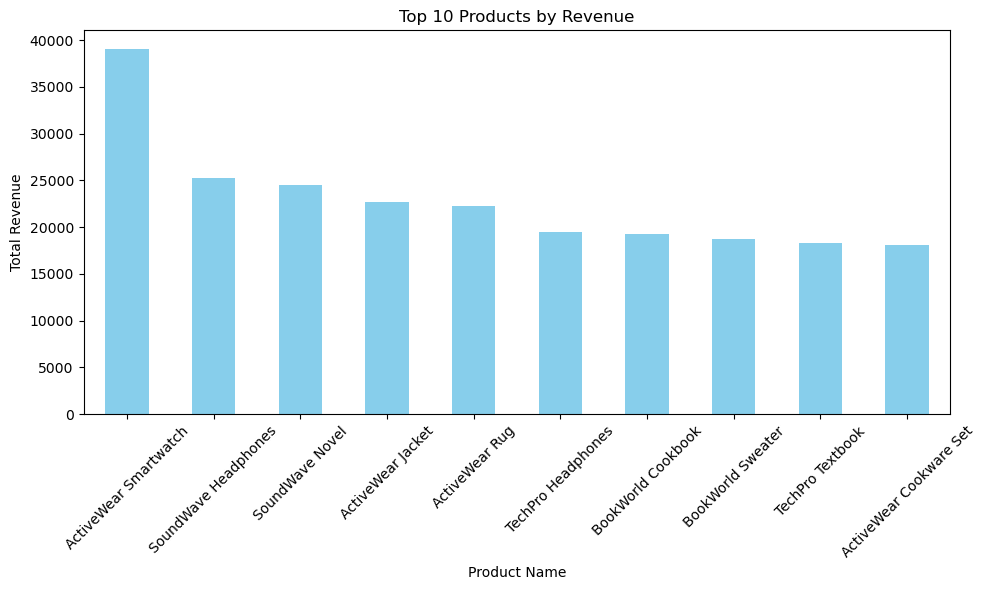


Transactions by Region:
Region
South America    304
North America    244
Europe           234
Asia             218
Name: count, dtype: int64


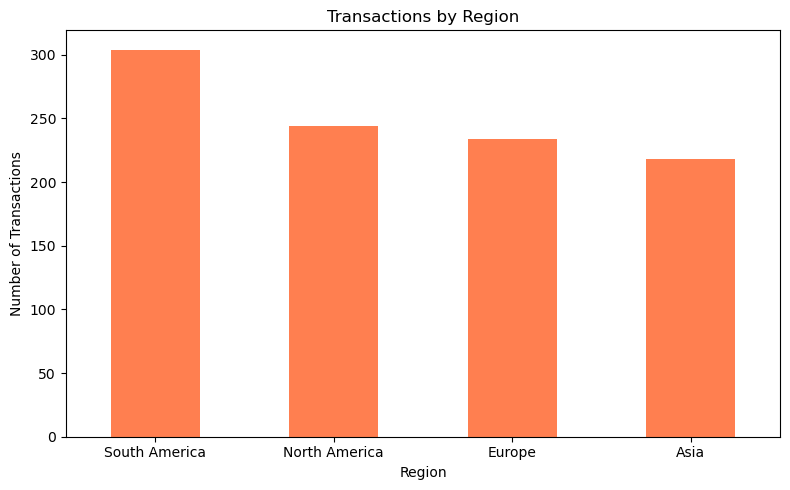


Monthly Revenue:
Month
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


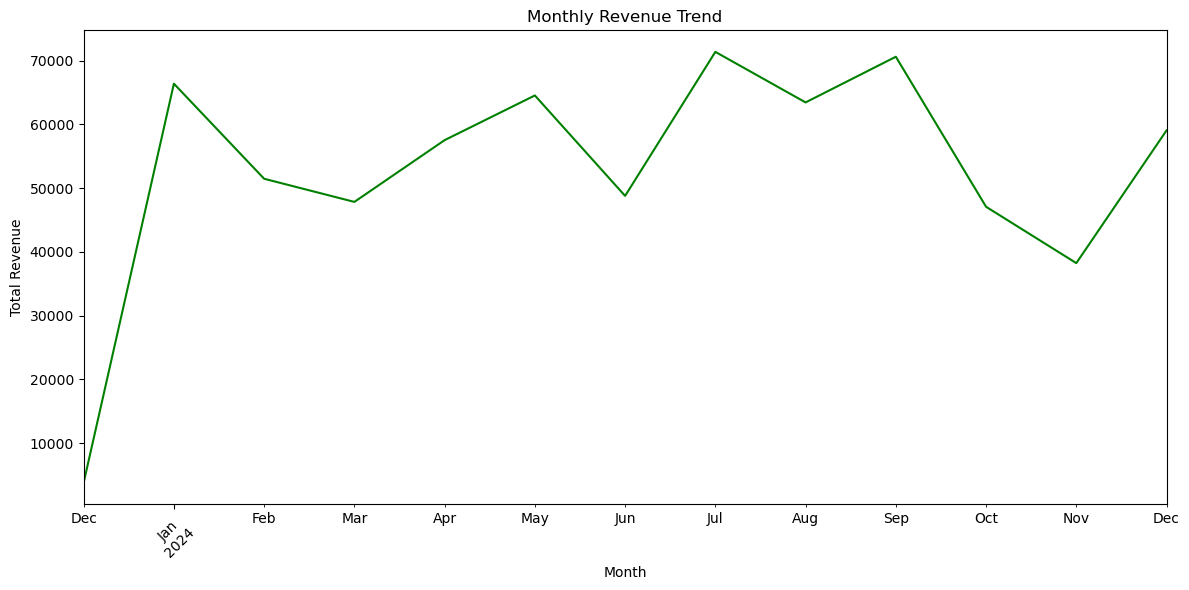


Revenue per Customer:
CustomerName
Paul Parsons            10673.87
Bruce Rhodes             8040.39
Gerald Hines             7663.70
William Adams            7634.45
Aimee Taylor             7572.91
Anna Ball                7111.32
Mrs. Kimberly Wright     7073.28
Jennifer Pena            6819.57
Rodney Eaton             6715.72
Juan Mcdaniel            6708.10
Name: TotalValue, dtype: float64


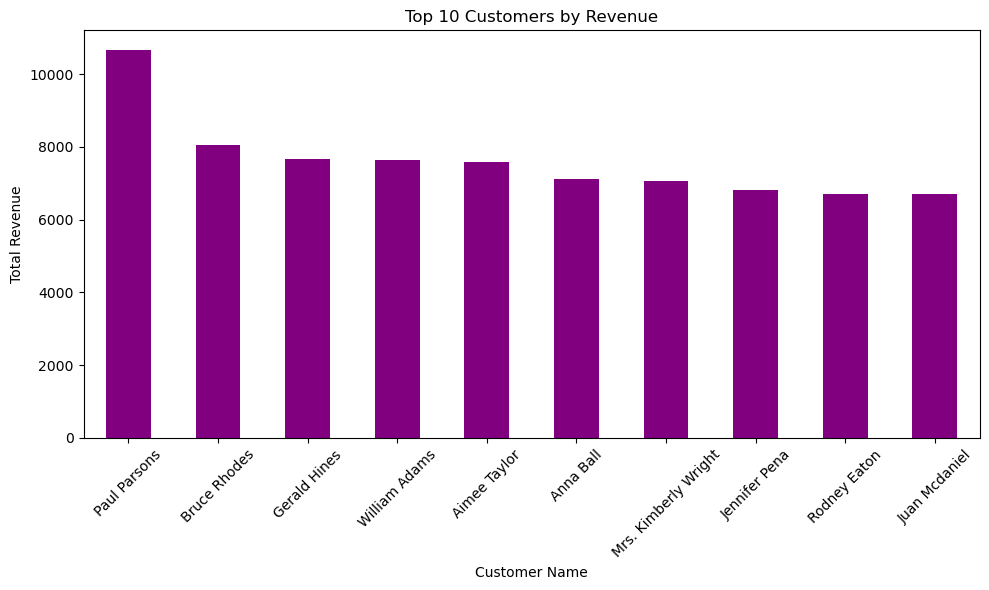


Price vs Quantity Correlation:
           Price_y  Quantity
Price_y   1.000000 -0.009378
Quantity -0.009378  1.000000


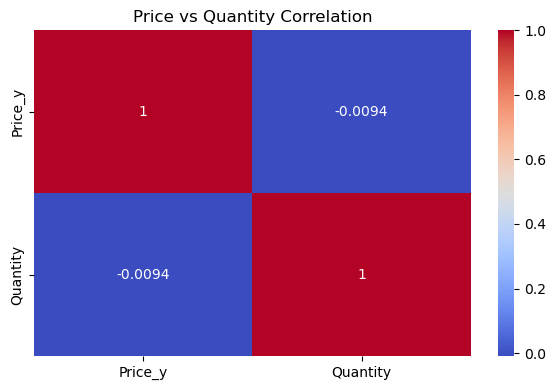

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


customers = pd.read_csv(r'C:\Users\kandu\Desktop\Downloads\Customers.csv')
products = pd.read_csv(r'C:\Users\kandu\Desktop\Downloads\Products.csv')
transactions = pd.read_csv(r'C:\Users\kandu\Desktop\Downloads\Transactions.csv')
print("Customers Data:")
print(customers.head())
print("\nProducts Data:")


print(products.head())
print("\nTransactions Data:")
print(transactions.head())


print("\nMissing Values:")
print("Customers:")
print(customers.isnull().sum())
print("Products:")
print(products.isnull().sum())
print("Transactions:")
print(transactions.isnull().sum())


merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')


print("\nMerged Data:")
print(merged_data.head())


revenue_per_product = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False)
print("\nRevenue per Product:")
print(revenue_per_product)


plt.figure(figsize=(10, 6))
revenue_per_product.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Products by Revenue')
plt.ylabel('Total Revenue')
plt.xlabel('Product Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


transactions_by_region = merged_data['Region'].value_counts()
print("\nTransactions by Region:")
print(transactions_by_region)


plt.figure(figsize=(8, 5))
transactions_by_region.plot(kind='bar', color='coral')
plt.title('Transactions by Region')
plt.ylabel('Number of Transactions')
plt.xlabel('Region')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_revenue = merged_data.groupby('Month')['TotalValue'].sum()

print("\nMonthly Revenue:")
print(monthly_revenue)


plt.figure(figsize=(12, 6))
monthly_revenue.plot(color='green')
plt.title('Monthly Revenue Trend')
plt.ylabel('Total Revenue')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


revenue_per_customer = merged_data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False)
print("\nRevenue per Customer:")
print(revenue_per_customer.head(10))


plt.figure(figsize=(10, 6))
revenue_per_customer.head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Customers by Revenue')
plt.ylabel('Total Revenue')
plt.xlabel('Customer Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


correlation = merged_data[['Price_y', 'Quantity']].corr()
print("\nPrice vs Quantity Correlation:")
print(correlation)


plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Price vs Quantity Correlation')
plt.tight_layout()
plt.show()
